<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/49_Day_R2_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [27]:
df=pd.read_csv('/content/weight-height.csv')

In [28]:
df=df.drop(['Gender'], axis=1)

In [29]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


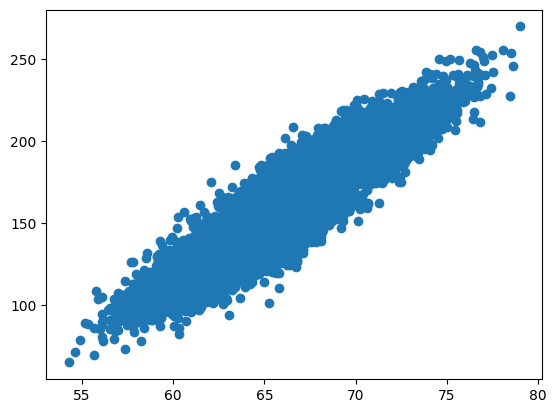

In [30]:
plt.scatter(df['Height'], df['Weight'])


In [31]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [32]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2)

In [33]:
y_train

,Weight
3693,218.063751
2737,180.201266
4227,154.104777
5240,119.548497
3257,186.056729
...,...
2556,182.875349
8440,122.708789
2297,139.196621
604,203.241732


In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [35]:
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred=lr.predict(X_test)

Text(0, 0.5, 'Weight')

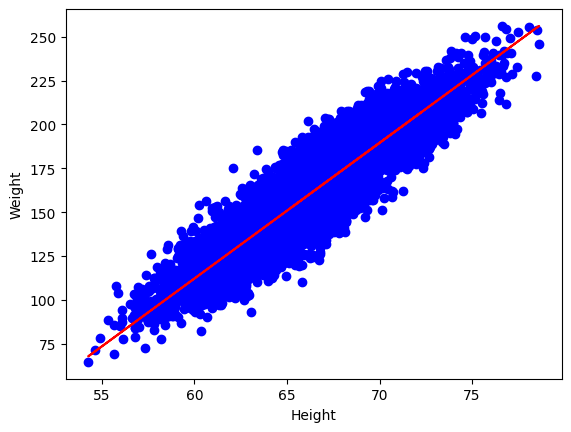

In [37]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('Height')
plt.ylabel('Weight')

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [39]:
print("MAE= ",mae)
print("MSE= ",mse)
print("RMSE= ",np.sqrt(mse))
print("R2_score= ",r2)

MAE=  9.645279532343473
MSE=  146.79626222183498
RMSE=  12.115950735366786
R2_score=  0.8571003369452825


In [40]:
# Adjusted R2 score
adj_r2=1-((1-r2)*(len(y_test)-1))/((len(y_test)-X_test.shape[1]-1))

In [41]:
X_test.shape

(2000, 1)

In [42]:
len(X_test)

2000

In [43]:
X_test.shape[1]

1

In [44]:
adj_r2

0.8570288155924023

# effect on adj r2 with column add

In [45]:
# 1. irrevelent column add
df1=df.copy()
df1['body_temp']=np.random.random(len(X))
df1=df1[['Height','body_temp','Weight']]

In [46]:
df1.sample(5)

,Height,body_temp,Weight
4110,67.366795,0.817454,167.291995
4946,67.902437,0.330509,173.397528
2165,68.481309,0.444658,185.765867
2200,72.218736,0.241190,198.388265
9061,65.855639,0.155843,162.544059


Text(0, 0.5, 'body_temp')

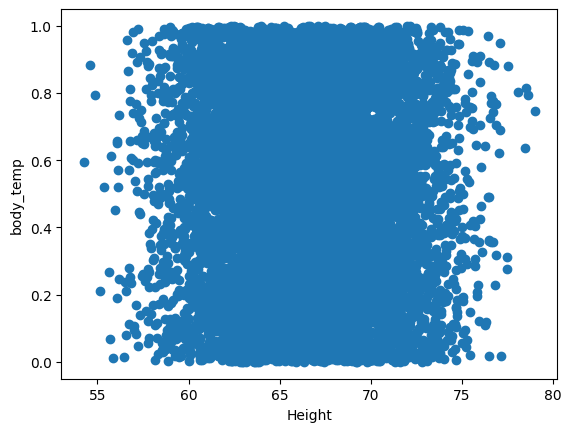

In [47]:
plt.scatter(df1['Height'],df1['body_temp'])
plt.xlabel('Height')
plt.ylabel('body_temp')

In [48]:
X=df1.iloc[:,0:2]
y=df1.iloc[:,-1]

In [49]:
X

,Height,body_temp
0,73.847017,0.109669
1,68.781904,0.851764
2,74.110105,0.671761
3,71.730978,0.168680
4,69.881796,0.003337
...,...,...
9995,66.172652,0.982898
9996,67.067155,0.703616
9997,63.867992,0.693052
9998,69.034243,0.703296


In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred=lr.predict(X_test)

In [52]:
r2_1=r2_score(y_test,y_pred)

In [53]:
print("new= ", r2_1) # r2 score increases
print("old= ", r2)

new=  0.8562279672647466
old=  0.8571003369452825


In [54]:
adj_r2_1=1 - ((1-r2)*(len(y_test)-1))/((len(y_test)-X_test.shape[1]-1))

In [55]:
print("new= ", adj_r2_1)
print("old= ", adj_r2)

new=  0.856957222610726
old=  0.8570288155924023


In [58]:
# 2. relevent column
df_2=pd.read_csv('/content/weight-height.csv')
df_2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0, 0.5, 'Gender')

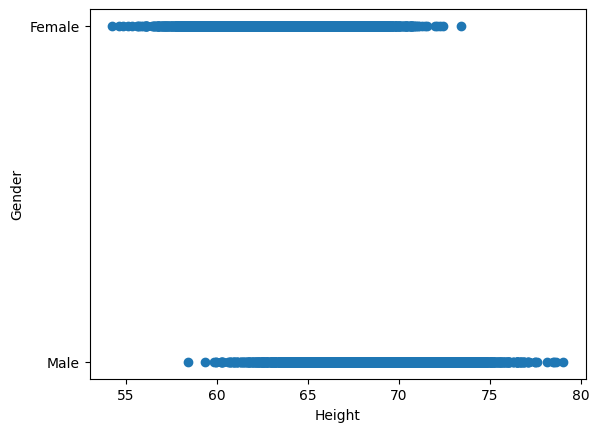

In [59]:
plt.scatter(df_2['Height'],df_2['Gender'])
plt.xlabel('Height')
plt.ylabel('Gender')

In [60]:
X=df_2.iloc[:,0:2]
y=df_2.iloc[:,-1]

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

ValueError: could not convert string to float: 'Female'

In [62]:
r2_2=r2_score(y_test,y_pred)
print("new= ", r2_2) # r2 score increases
print("old= ", r2)

new=  0.8562279672647466
old=  0.8571003369452825


In [63]:
adj_r2_2=1 - ((1-r2)*(len(y_test)-1))/((len(y_test)-X_test.shape[1]-1))
print("new= ", adj_r2_2)
print("old= ", adj_r2)


new=  0.856957222610726
old=  0.8570288155924023
